In [1]:
# Tuto : https://www.tensorflow.org/tutorials/keras/classification?hl=fr
# Execute with Tensorflow 2.5
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Print Tensorflow et OpenCV versions
print("Tensorflow version :",tf.__version__)
print("OpenCV version", cv2.__version__)

Tensorflow version : 2.5.0
OpenCV version 4.5.4


In [3]:
# Check if OpenCV is build with CUDA and GStreamer
print(cv2.getBuildInformation())


General configuration for OpenCV 4.5.4 =====================================
  Version control:               unknown

  Extra modules:
    Location (extra):            /home/cooptek/opencv_contrib/modules
    Version control (extra):     unknown

  Platform:
    Timestamp:                   2021-10-21T19:32:37Z
    Host:                        Linux 4.9.253-tegra aarch64
    CMake:                       3.10.2
    CMake generator:             Unix Makefiles
    CMake build tool:            /usr/bin/make
    Configuration:               RELEASE

  CPU/HW features:
    Baseline:                    NEON FP16
      required:                  NEON

  C/C++:
    Built as dynamic libs?:      YES
    C++ standard:                11
    C++ Compiler:                /usr/bin/c++  (ver 7.5.0)
    C++ flags (Release):         -fsigned-char -ffast-math -W -Wall -Werror=return-type -Werror=non-virtual-dtor -Werror=address -Werror=sequence-point -Wformat -Werror=format-security -Wmissing-declaratio

In [4]:
# Importer le jeu de données Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [5]:
# Mappage des étiquettes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Exploration des données
# Explorons le format de l'ensemble de données avant d'entraîner le modèle. Ce qui suit montre qu'il y a 60 000 images dans l'ensemble d'apprentissage, chaque image étant représentée en 28 x 28 pixels :
print('train_images.shape:',train_images.shape)
print(type(train_images))
# De même, il y a 60 000 étiquettes dans l'ensemble d'apprentissage :
print('len(train_labels):',len(train_labels))
# Chaque étiquette est un entier compris entre 0 et 9 :
print('train_labels:',train_labels)
# Il y a 10 000 images dans l'ensemble de test. Encore une fois, chaque image est représentée en 28 x 28 pixels :
print('test_images.shape:',test_images.shape)
# Et l'ensemble de test contient 10 000 étiquettes d'images :
print('len(tes_labels):',len(test_labels))

train_images.shape: (60000, 28, 28)
<class 'numpy.ndarray'>
len(train_labels): 60000
train_labels: [9 0 0 ... 3 0 5]
test_images.shape: (10000, 28, 28)
len(tes_labels): 10000


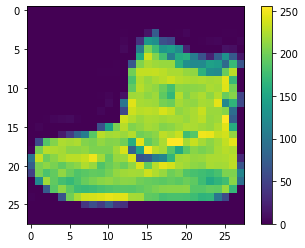

In [7]:
# Prétraitement des données
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Normalisation des échelles pour les transmettre au modèle de réseau de neuronnes
train_images = train_images / 255.0
test_images = test_images / 255.0

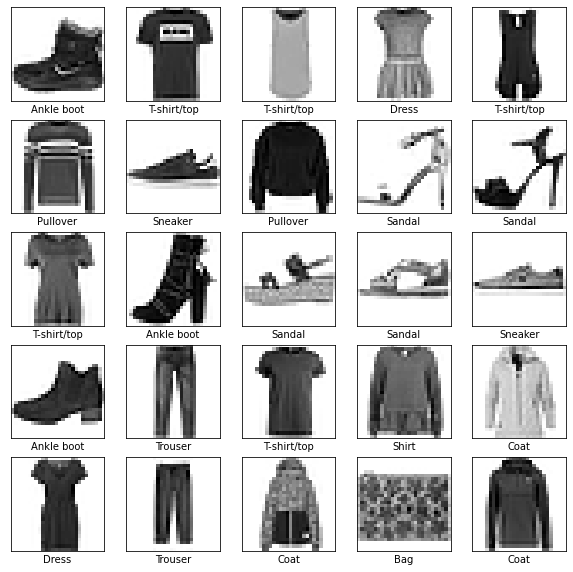

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
# Construction du modèle
# La construction du réseau de neurones nécessite de configurer les couches du modèle, puis de compiler le modèle.
# Mettre en place les calques
# Le bloc de construction de base d'un réseau de neurones est la couche . Les couches extraient des représentations à partir des données qui y sont introduites. Espérons que ces représentations soient significatives pour le problème en question.
# La plupart du deep learning consiste à enchaîner des couches simples. La plupart des couches, telles que tf.keras.layers.Dense , ont des paramètres qui sont appris pendant l'entraînement.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

'''
La première couche de ce réseau, tf.keras.layers.Flatten , transforme le format des images d'un tableau bidimensionnel (de 28 par 28 pixels) en un tableau unidimensionnel (de 28 * 28 = 784 pixels). Considérez ce calque comme un dépilage de rangées de pixels dans l'image et leur alignement. Cette couche n'a pas de paramètres à apprendre ; il reformate seulement les données.
Une fois les pixels aplatis, le réseau se compose d'une séquence de deux couches tf.keras.layers.Dense . Ce sont des couches neuronales densément connectées ou entièrement connectées. La première couche Dense a 128 nœuds (ou neurones). La deuxième (et dernière) couche renvoie un tableau logits d'une longueur de 10. Chaque nœud contient un score qui indique que l'image actuelle appartient à l'une des 10 classes.
'''

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
# Formation du modèle
# Pour commencer l'entraînement, appelez la méthode model.fit , ainsi appelée parce qu'elle « ajuste » le modèle aux données d'entraînement :
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 16ms/step - loss: 0.4995 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3765 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3393 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3131 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2931 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2814 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2663 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2587 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2470 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [12]:
# Evaluation de la précision
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.3455 - accuracy: 0.8771

Test accuracy: 0.8770999908447266


In [13]:
# Faire des prédictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(test_labels[0])                                        

9


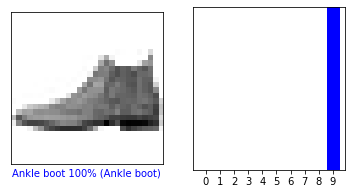

In [14]:
# Représentation graphiques des prédictions

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

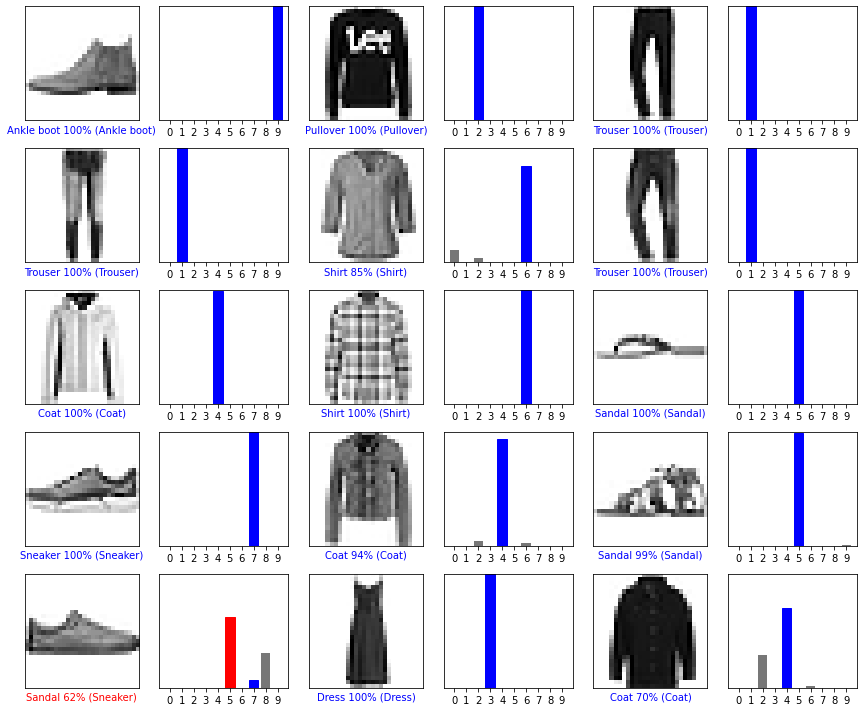

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(1, 28, 28)
[[5.2689746e-05 6.5753842e-15 9.9971563e-01 2.1021997e-12 2.0579823e-04
  7.2763993e-15 2.5862348e-05 4.3548082e-23 4.5865536e-10 4.7602471e-17]]


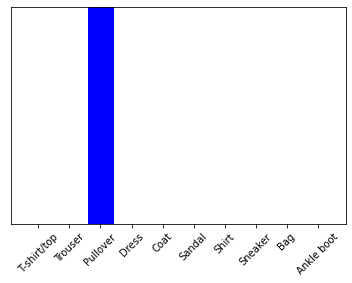

2

In [16]:
# Utilisation du modèle entrainé
# Grab an image from the test dataset.
img = test_images[1]
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

np.argmax(predictions_single[0])